# Bike Sharing

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import learning_curve

## Team Members
- Prithvi Kumar Panchapakeshan

## Estimate of number of bikes hired in a given hour

## Project Definition

### Goals

Describe the goal of this project.

Example:
The goal of this project is to estimate the number of bikes on any given day taking into consideration other factors like
temperature, whether its a working day, etc.


### Dataset

Briefly describe the source(s) of data you are using.
- Provide the URL to the data source.
- If you are providing your own data set, include the data with your project submission.
- You can find sample datasets from:
  - http://archive.ics.uci.edu/ml/datasets.html
  - http://data.gov.sg/

Example:

We will use the dataset from: https://data.gov.sg/dataset/coe-bidding-results

#### Format: CSV

#### Columns:
 
|Name|Type|Unit of Measure|Description|
|--|--|--|--|
|instant|Numeric|none|index number|
|dteday|Datetime, dd/MM/YYYY|none|date range: Jan 1, 2011 to Mar 31, 2012|
|season|Numeric|none|type of season|
|yr|Numeric|none|0-2011:1-2012
|mnth|Numeric|none|Month number 1-Jan,12-Dec|
|hr|Numeric|none|Hour of the day (0-23)
|holiday|Numeric|none|0-No Holiday,1-Holiday|
|weekday|Numeric|none|0-Sunday,6-Saturday|
|workingday|Numeric|none|1-working day,0-not a working day|
|weathersit|Numeric|none|weather type|
|temp|Double|--|temperature|
|atemp|Double|--|--|
|hum|Double|--|humidity|
|windspeed|Double|--|windspeed|
|casual|Numeric|none|number of casual riders who rented bike|
|registered|Numeric|none|number of registered users who rented|
|cnt|Numeric|none|total number of rentals|

### Tasks
 
1. Process the dataset and identify the features which have good correlation with the number of bikes hired.
2. Shuffle and split into train and test sets. Use separate train and test sets to predict casual users and registered users.
3. Train a clustering algorithm, using Linear regression and SGD.
4. Compute the metrics for the algorithm.
5. Perform analysis for possible improvements.

## Section 3: Prepare Dataset

Write your code below to prepare the dataset using pandas

Read the data and take data only for a few hours.

In [273]:
df1 = pd.read_csv("C:\\courses\\data\\bike-sharing\\hour.csv", parse_dates=True, encoding='latin-1')
df=df1[(df1['hr']>=11) & (df1['hr']<17)]
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10,11,1/1/2011,1,0,1,11,0,6,0,1,0.36,0.3333,0.81,0.2836,26,30,56
11,12,1/1/2011,1,0,1,12,0,6,0,1,0.42,0.4242,0.77,0.2836,29,55,84
12,13,1/1/2011,1,0,1,13,0,6,0,2,0.46,0.4545,0.72,0.2985,47,47,94
13,14,1/1/2011,1,0,1,14,0,6,0,2,0.46,0.4545,0.72,0.2836,35,71,106
14,15,1/1/2011,1,0,1,15,0,6,0,2,0.44,0.4394,0.77,0.2985,40,70,110


In [274]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,4369.000000,4369.000000,4369.000000,4369.000000,4369.000000,4369.000000,4369.000000,4369.000000,4369.000000,4369.000000,4369.000000,4369.000000,4369.000000,4369.000000,4369.000000,4369.000000
mean,8653.993362,2.495766,0.500114,6.520485,13.502174,0.028840,3.000458,0.682765,1.436484,0.552644,0.523109,0.517345,0.225032,70.748455,182.517967,253.266423
std,5027.729253,1.108799,0.500057,3.446225,1.708243,0.167375,2.005373,0.465453,0.640624,0.198588,0.176337,0.182771,0.129448,66.734876,92.573366,146.941048
min,11.000000,1.000000,0.000000,1.000000,11.000000,0.000000,0.000000,0.000000,1.000000,0.060000,0.075800,0.000000,0.000000,0.000000,3.000000,3.000000
25%,4306.000000,2.000000,0.000000,4.000000,12.000000,0.000000,1.000000,0.000000,1.000000,0.380000,0.393900,0.380000,0.134300,24.000000,115.000000,147.000000
50%,8653.000000,3.000000,1.000000,7.000000,14.000000,0.000000,3.000000,1.000000,1.000000,0.560000,0.530300,0.480000,0.223900,51.000000,173.000000,226.000000
75%,13010.000000,3.000000,1.000000,10.000000,15.000000,0.000000,5.000000,1.000000,2.000000,0.720000,0.666700,0.630000,0.298500,90.000000,237.000000,331.000000
max,17363.000000,4.000000,1.000000,12.000000,16.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.806000,367.000000,526.000000,783.000000


In [275]:
# Convert dates (Optional)
#df['dteday'] = pd.to_datetime(df['dteday'], format='%Y/%m/%d')
#df['dteday']
df.drop(['instant'],axis=1,inplace=True)
#df.index = df['instant']


C:\Users\prith\AppData\Local\Continuum\anaconda3\envs\mldds02\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


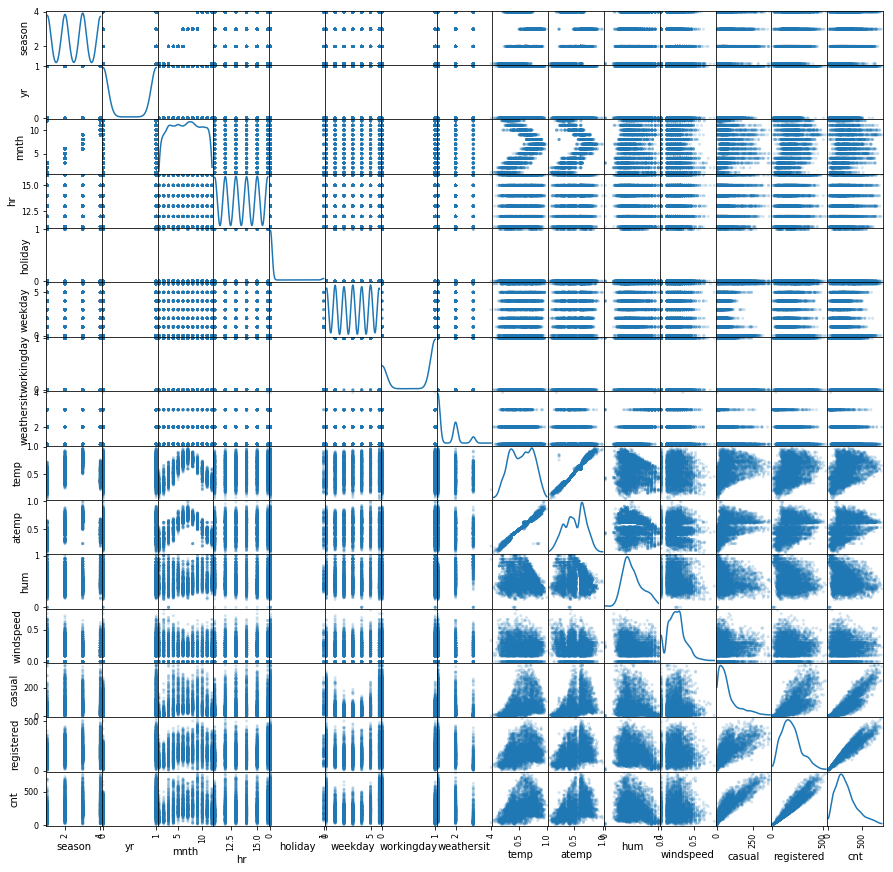

In [277]:
from pandas.plotting import scatter_matrix
#df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
scatter_matrix(df, alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

In [278]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [279]:
casual_columns=['hr','workingday', 'temp', 'hum', 'windspeed']
print(casual_columns)
regd_columns=['mnth',
       'workingday', 'temp', 'atemp', 'hum', 'windspeed','casual']
print(regd_columns)

['hr', 'workingday', 'temp', 'hum', 'windspeed']
['mnth', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual']


In [280]:
pca = PCA(n_components=2)

X = df.loc[:,casual_columns]
X_2d = pca.fit_transform(X)

print(X.shape)
print(df.describe())

X_2d.shape
print(X.columns)

y_casual = df.casual
#y_casual = df.casual
y_regd = df.registered

(4369, 5)
            season           yr         mnth           hr      holiday  \
count  4369.000000  4369.000000  4369.000000  4369.000000  4369.000000   
mean      2.495766     0.500114     6.520485    13.502174     0.028840   
std       1.108799     0.500057     3.446225     1.708243     0.167375   
min       1.000000     0.000000     1.000000    11.000000     0.000000   
25%       2.000000     0.000000     4.000000    12.000000     0.000000   
50%       3.000000     1.000000     7.000000    14.000000     0.000000   
75%       3.000000     1.000000    10.000000    15.000000     0.000000   
max       4.000000     1.000000    12.000000    16.000000     1.000000   

           weekday   workingday   weathersit         temp        atemp  \
count  4369.000000  4369.000000  4369.000000  4369.000000  4369.000000   
mean      3.000458     0.682765     1.436484     0.552644     0.523109   
std       2.005373     0.465453     0.640624     0.198588     0.176337   
min       0.000000     0.00

In [281]:
df[(df['hr']>9) & (df['hr']<20)]

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10,1/1/2011,1,0,1,11,0,6,0,1,0.36,0.3333,0.81,0.2836,26,30,56
11,1/1/2011,1,0,1,12,0,6,0,1,0.42,0.4242,0.77,0.2836,29,55,84
12,1/1/2011,1,0,1,13,0,6,0,2,0.46,0.4545,0.72,0.2985,47,47,94
13,1/1/2011,1,0,1,14,0,6,0,2,0.46,0.4545,0.72,0.2836,35,71,106
14,1/1/2011,1,0,1,15,0,6,0,2,0.44,0.4394,0.77,0.2985,40,70,110
15,1/1/2011,1,0,1,16,0,6,0,2,0.42,0.4242,0.82,0.2985,41,52,93
33,2/1/2011,1,0,1,11,0,0,0,2,0.36,0.3333,0.71,0.2537,16,54,70
34,2/1/2011,1,0,1,12,0,0,0,2,0.36,0.3333,0.66,0.2985,20,73,93
35,2/1/2011,1,0,1,13,0,0,0,2,0.36,0.3485,0.66,0.1343,11,64,75
36,2/1/2011,1,0,1,14,0,0,0,3,0.36,0.3485,0.76,0.1940,4,55,59


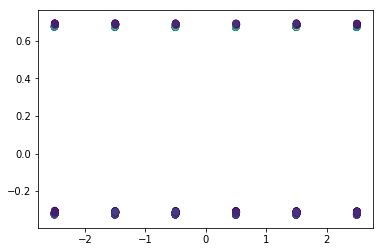

In [282]:
fig, ax = plt.subplots()
ax.scatter(X_2d[:, 0], X_2d[:, 1], c=y_casual)
plt.show()

## Section 4: Select Features

Write your code below to create X_train, X_test, y_train, y_test

In [283]:
X_train, X_test, y_train_casual, y_test_casual = train_test_split(X, y_casual,random_state=42)

In [284]:
scaler_X = StandardScaler()
scaler_X.fit(X_train)
X_scaled_train = scaler_X.transform(X_train)
X_scaled_test = scaler_X.transform(X_test)
print(X_scaled_train.shape)
print(X_scaled_test.shape)

# 2. scale both y series
scaler_y = StandardScaler()
#y_scaled_train = scaler_y.transform(y_train.values.reshape(-1, 1))
#y_scaled_test = scaler_y.transform(y_test.values.reshape(-1, 1))

#Without scaling Y
y_scaled_casual_train = y_train_casual.values
y_scaled_casual_test = y_test_casual.values
y_scaled_casual_train[0]
print(y_scaled_casual_train.shape)
print(y_scaled_casual_test.shape)

(3276, 5)
(1093, 5)
(3276,)
(1093,)


In [285]:
X_regd = df.loc[:,regd_columns]

In [286]:
X_train_regd, X_test_regd, y_train_regd, y_test_regd = train_test_split(X_regd, y_regd,random_state=42)

In [287]:
scaler_X_regd = StandardScaler()
scaler_X_regd.fit(X_train_regd)
X_scaled_train_regd = scaler_X_regd.transform(X_train_regd)
X_scaled_test_regd = scaler_X_regd.transform(X_test_regd)
print(X_scaled_train_regd.shape)
print(X_scaled_test_regd.shape)

#Without scaling Y
#scaler_y.fit(y_train.values.reshape(-1, 1))
#print(y_train.values.reshape(-1,1).shape)
scaler_y_regd = StandardScaler()
scaler_y_regd.fit(y_train_regd.values.reshape(-1, 1))
y_scaled_regd_train = scaler_y_regd.transform(y_train_regd.values.reshape(-1, 1))
y_scaled_regd_test = scaler_y_regd.transform(y_test_regd.values.reshape(-1, 1))
y_scaled_regd_train[0]
print(y_scaled_regd_train.shape)
print(y_scaled_regd_test.shape)

(3276, 7)
(1093, 7)
(3276, 1)
(1093, 1)


C:\Users\prith\AppData\Local\Continuum\anaconda3\envs\mldds02\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Section 5: Train the algorithm(s)

Write your code below to initialize and train the algorithm(s)

In [288]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin = LinearRegression()
lin.fit(X_scaled_train, y_scaled_casual_train)

pred_scaled = lin.predict(X_scaled_test)

print('MSE', mean_squared_error(y_scaled_casual_test, pred_scaled))
print('R2', r2_score(y_scaled_casual_test, pred_scaled))

MSE 1938.7868523937889
R2 0.5413812766719512


In [289]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(verbose=True,
                   tol=1e-4, # stop training when |new_loss - loss| < 1e-4
                   max_iter = 1000) # sklearn forces us to set max_iter
sgd.fit(X_scaled_train, y_scaled_casual_train) # ravel converts 2-D array to 1-D vector

pred_scaled_sgd = sgd.predict(X_scaled_test)

print('MSE', mean_squared_error(y_scaled_casual_test, pred_scaled_sgd))
print('R2', r2_score(y_scaled_casual_test, pred_scaled_sgd))

-- Epoch 1
Norm: 52.47, NNZs: 5, Bias: 72.484327, T: 3276, Avg. loss: 1168.524542
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 51.79, NNZs: 5, Bias: 72.373275, T: 6552, Avg. loss: 980.383888
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 52.29, NNZs: 5, Bias: 73.225433, T: 9828, Avg. loss: 979.077395
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 53.22, NNZs: 5, Bias: 72.885512, T: 13104, Avg. loss: 979.188550
Total training time: 0.00 seconds.
Convergence after 4 epochs took 0.00 seconds
MSE 1963.7361531658976
R2 0.5354795363883794


In [290]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_regd = LinearRegression()
lin_regd.fit(X_scaled_train_regd, y_scaled_regd_train)

pred_scaled_regd = lin_regd.predict(X_scaled_test_regd)

print('MSE', mean_squared_error(y_scaled_regd_test, pred_scaled_regd))
print('R2', r2_score(y_scaled_regd_test, pred_scaled_regd))

MSE 0.41663768311159033
R2 0.562391236147459


In [291]:
from sklearn.linear_model import SGDRegressor

sgd_regd = SGDRegressor(verbose=True,
                   tol=1e-4, # stop training when |new_loss - loss| < 1e-4
                   max_iter = 1000) # sklearn forces us to set max_iter
sgd_regd.fit(X_scaled_train_regd, y_scaled_regd_train.ravel()) # ravel converts 2-D array to 1-D vector

pred_scaled_regd_sgd = sgd_regd.predict(X_scaled_test_regd)

print('MSE', mean_squared_error(y_scaled_regd_test, pred_scaled_regd_sgd))
print('R2', r2_score(y_scaled_regd_test, pred_scaled_regd_sgd))

-- Epoch 1
Norm: 0.62, NNZs: 7, Bias: 0.002114, T: 3276, Avg. loss: 0.246672
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.69, NNZs: 7, Bias: 0.005671, T: 6552, Avg. loss: 0.232285
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.71, NNZs: 7, Bias: -0.012739, T: 9828, Avg. loss: 0.231417
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.72, NNZs: 7, Bias: 0.007060, T: 13104, Avg. loss: 0.231174
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.73, NNZs: 7, Bias: -0.007213, T: 16380, Avg. loss: 0.231212
Total training time: 0.00 seconds.
Convergence after 5 epochs took 0.00 seconds
MSE 0.41577924983070047
R2 0.5632928778906987


## Section 6: Evaluate metrics

Write your code below to evaluate metrics for the trained algorithm(s).

Feel free to plot the algorithm to visualize it, as appropriately.

In [292]:
df_predict = pd.read_csv('C:\\courses\\data\\bike-sharing\\hour_Test.csv',na_values=['?', 'nan'])
df_predict

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
1,2,18/5/2011,2,0,5,0,0,3,1,2,0.54,0.5152,0.88,0.2239,8,15,23
2,3,3/5/2011,2,0,5,0,0,2,1,2,0.56,0.5303,0.83,0.2239,0,16,16
3,4,15/5/2012,2,1,5,14,0,2,1,2,0.64,0.6061,0.73,0.1940,39,145,184
4,5,16/5/2012,2,1,5,20,0,3,1,1,0.66,0.6212,0.65,0.2537,61,398,459
5,6,29/5/2012,2,1,5,12,0,2,1,1,0.80,0.7576,0.55,0.3284,56,181,237
6,7,3/12/2012,4,1,12,14,0,1,1,1,0.60,0.6212,0.53,0.0000,51,209,260
7,8,25/12/2012,1,1,12,20,1,2,0,2,0.32,0.3030,0.66,0.2836,11,29,40
8,9,4/2/2011,1,0,2,8,0,5,1,1,0.14,0.1515,0.74,0.1343,3,217,220


In [293]:
X_predict = df_predict.loc[:,casual_columns]
#X_predict.drop(['yr'],axis=1,inplace=True)
#X_predict.drop(['yr','mnth','holiday','weekday','weathersit'],axis=1,inplace=True)

In [294]:
X_scaled_predict = scaler_X.transform(X_predict)
X_scaled_predict.shape

(9, 5)

In [295]:
y_pred1_casual_lin = lin.predict(X_scaled_predict)
y_pred1_casual_lin.shape

(9,)

In [296]:
#print(scaler_y.inverse_transform(y_pred1_lin))
#Have to check for 4th, 6th and 7th predictions. Actual numbers are 39, 56, 51
print(y_pred1_casual_lin)

[ 70.39678134   6.65623345  12.00004707  45.26213494  57.29086671
  70.40014039  55.76632903  99.16955635 -29.71867743]


In [297]:
y_pred1_casual_sgd = sgd.predict(X_scaled_predict)

In [298]:
#print(scaler_y.inverse_transform(y_pred1_sgd))
print(y_pred1_casual_sgd)

[ 68.45337779   0.63348067   6.20458032  44.90020183  59.33868509
  70.64460399  55.6576339  103.04700211 -34.45766681]


In [299]:
X_predict = df_predict.loc[:,regd_columns]
#X_predict.drop(['yr'],axis=1,inplace=True)
#X_predict.drop(['yr','season','holiday','weekday','weathersit'],axis=1,inplace=True)

In [300]:
X_scaled_predict = scaler_X_regd.transform(X_predict)

In [301]:
y_pred1_regd_lin = lin_regd.predict(X_scaled_predict)

In [302]:
print(scaler_y_regd.inverse_transform(y_pred1_regd_lin))
#print(y_pred1_regd_lin)

[[ 54.4953459 ]
 [ 99.30523034]
 [ 95.18293934]
 [140.31286633]
 [165.9707483 ]
 [171.09176476]
 [204.72563227]
 [128.65843984]
 [ 77.56848722]]


## Section 7: Observations and analysis

Answer the following questions:
1. How did you measure the algorithm? Specify the metrics you used.

2. What is the outcome of the measurement? Explain the interpretation of the metrics.

  - Is there overfitting or underfitting?
  - Is there low accuracy or high error? If so, why do you think this is the case?

3. What improvements do you propose? 

4. What is the most challenging part of this project?

Training data for only a few hours of the day seems to increase the R2 score. Predictions are also close to the actual values.

Improvements: There can be multiple models, one for every few hours. Depending on the data being predicted, appropriate model could be used.